# Percolation cluster stats

In [1]:
from os import path
import pickle
import numpy as np
from numba import njit
from qcnico.plt_utils import histogram

#@njit
def get_dcrits(run_inds,temps,datadir):
    nsamples = len(run_inds)
    ntemps = len(temps)
    dcrits = np.zeros((nsamples,ntemps))
    for k in range(nsamples):
        for l in range(ntemps):
            sampdir = f"sample-{run_inds[k]}"
            pkl = f"out_percolate-{temps[l]}K.pkl"
            fo = open(path.join(datadir,sampdir,pkl),'rb')
            dat = pickle.load(fo)
            dcrits[k,l] = dat[1]
            fo.close()

    return dcrits


datadir=path.expanduser("~/Desktop/simulation_outputs/percolation/40x40/percolate_output")
fgood_runs = path.join(datadir, 'good_runs.txt')
with open(fgood_runs) as fo:
    lines = fo.readlines()

gr_inds = list(map(int,[line.rstrip().lstrip().split('-')[1] for line in lines]))

temps = np.arange(0,1050,50)
temps[0] = 10

dcrits = get_dcrits(gr_inds,temps, datadir)
print(dcrits.shape)

davg_T = np.mean(dcrits,axis=0)
print(davg_T.shape)




(174, 21)
(21,)


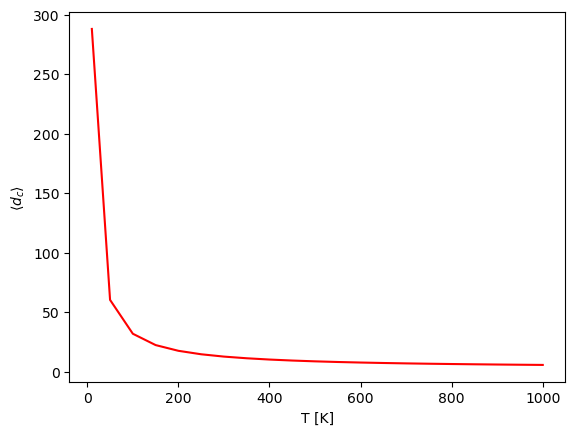

In [2]:
import matplotlib.pyplot as plt
plt.plot(temps,davg_T,'r-')
plt.xlabel('T [K]')
plt.ylabel('$\langle d_{c}\\rangle$')
plt.show()

[ 0  5 10 15 20]
[4.47581563 4.47581563 4.47581563 4.47581563 4.47581563 4.47581563
 4.47581563 4.47581563 4.47581563 4.47581563 4.47581563 4.47581563
 4.47581563 4.47581563 4.47581563 4.47581563 4.47581563 4.47581563
 4.47581563 4.47581563 4.47581563 4.47581563 4.47581563 4.47581563
 4.47581563]
[0.19542099 0.19542099 0.19542099 0.19542099 0.19542099 0.19542099
 0.19542099 0.19542099 0.19542099 0.19542099 0.19542099 0.19542099
 0.19542099 0.19542099 0.19542099 0.19542099 0.19542099 0.19542099
 0.19542099 0.19542099 0.19542099 0.19542099 0.19542099 0.19542099
 0.19542099]
[0.16126933 0.16126933 0.16126933 0.16126933 0.16126933 0.16126933
 0.16126933 0.16126933 0.16126933 0.16126933 0.16126933 0.16126933
 0.16126933 0.16126933 0.16126933 0.16126933 0.16126933 0.16126933
 0.16126933 0.16126933 0.16126933 0.16126933 0.16126933 0.16126933
 0.16126933]
[0.15574538 0.15574538 0.15574538 0.15574538 0.15574538 0.15574538
 0.15574538 0.15574538 0.15574538 0.15574538 0.15574538 0.15574538
 0.155

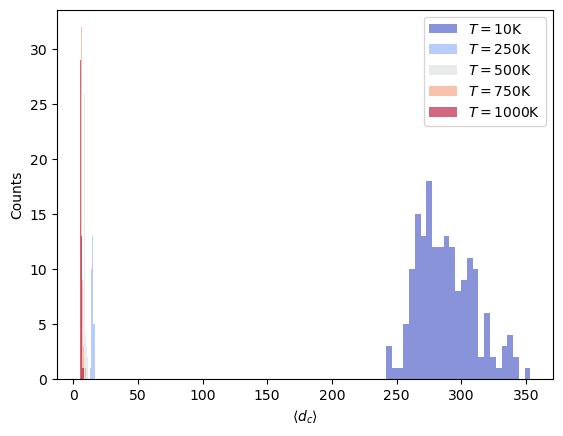

In [3]:
from qcnico import plt_utils

Tcm = plt_utils.get_cm(temps,'coolwarm',max_val=1.0)

fig, ax = plt.subplots()

plot_inds = np.arange(0,25,5)
print(plot_inds)

for n in plot_inds:
    plt_utils.histogram(dcrits[:,n],nbins=25,show=False, normalised=False, plt_objs=(fig,ax),
        plt_kwargs={'alpha': 0.6, 'color': Tcm[n], 'label': f'$T = {temps[n]}$K'})
ax.set_xlabel('$\langle d_{c}\\rangle$')
plt.legend()
plt.show()

In [8]:
temps[np.argmin(np.abs(davg_T-80))]
davg_T[np.argmin(np.abs(davg_T-80))]


60.50172801917466